In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1328 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1337 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1337.000000
mean,39.207025,30.663397,1.094918,13278.981412
std,14.049960,6.098187,1.205493,12110.493301
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.693750,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data['sex'].replace({'male':0,'female':1},inplace=True)
data['smoker'].replace({'no':0,'yes':1},inplace=True)

Text(0.5,1,'Distribution of charges by age and sex')

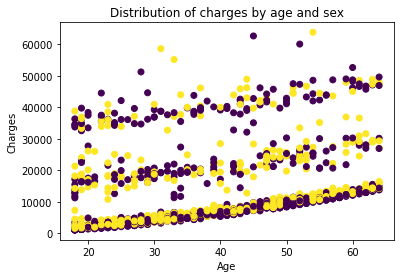

In [7]:
plt.scatter(x = "age", y = "charges", data = data,c=data.sex)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and sex")

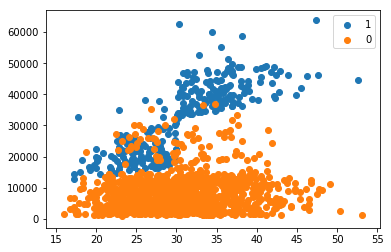

In [8]:
smokers = data["smoker"].unique()
colors = ["Reds", "Greens"]
for i, smoker in enumerate(smokers):
    temp = data[data["smoker"] == smoker]
    plt.scatter(temp["bmi"], temp["charges"], cmap = colors[i])
plt.legend(smokers)

In [9]:
data.isna().sum()

age          0
sex         10
bmi          0
children     0
smoker       0
region       0
charges      1
dtype: int64

In [10]:
data.fillna(data.mean(),inplace=True)
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
result=pd.get_dummies(data['region'],prefix='region')
result.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [13]:
data['northwest']=result['region_northwest']
data['southwest']=result['region_southwest']
data['northeast']=result['region_northeast']
data['southeast']=result['region_southeast']

data.drop(columns=['region'],inplace=True)
data.head()

,age,sex,bmi,children,smoker,charges,northwest,southwest,northeast,southeast
0,19,1.0,27.900,0,1,16884.92400,0,1,0,0
1,18,0.0,33.770,1,0,1725.55230,0,0,0,1
2,28,0.0,33.000,3,0,4449.46200,0,0,0,1
3,33,0.0,22.705,0,0,21984.47061,1,0,0,0
4,32,0.0,28.880,0,0,3866.85520,1,0,0,0


In [14]:
data.isna().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
southwest    0
northeast    0
southeast    0
dtype: int64

In [15]:
from sklearn.preprocessing import Imputer
imp=Imputer(strategy='most_frequent')
data=pd.DataFrame(imp.fit_transform(data),columns=data.columns)

In [16]:
data.isna().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
southwest    0
northeast    0
southeast    0
dtype: int64

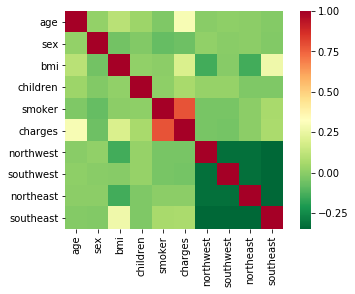

In [17]:
sns.heatmap(data.corr(),square=True,cmap='RdYlGn_r')
plt.show()

**Conclusion**: No features can be dropped

In [18]:
x=data.drop(columns=['charges'])
y=data['charges']

In [19]:
from sklearn.preprocessing import StandardScaler
scalerx=StandardScaler()
scaled_x=pd.DataFrame(scalerx.fit_transform(x[['age','bmi']]),columns=['age', 'bmi'])

scalery=StandardScaler()
scaled_y=scalery.fit_transform(data[['charges']])

In [20]:
x.head()

,age,sex,bmi,children,smoker,northwest,southwest,northeast,southeast
0,19.0,1.0,27.900,0.0,1.0,0.0,1.0,0.0,0.0
1,18.0,0.0,33.770,1.0,0.0,0.0,0.0,0.0,1.0
2,28.0,0.0,33.000,3.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,22.705,0.0,0.0,1.0,0.0,0.0,0.0
4,32.0,0.0,28.880,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
x.age=scaled_x.age
x.bmi=scaled_x.bmi

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,scaled_y,test_size=0.3,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
predictions=lr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,predictions))

0.7695188783480551


In [25]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,predictions))

0.2307636086080827


In [26]:
new_data=pd.DataFrame(columns=data.columns)
new_data=new_data.append({'age':32,'sex':'female','bmi':33.27,'children':2,'smoker':'yes','region':'southwest'},ignore_index=True)
new_data=new_data.append({'age':85,'sex':'male','bmi':39.27,'children':3,'smoker':'no','region':'southwest'},ignore_index=True)
new_data.head()
# USE 'y_new_inverse = scalery.inverse_transform(y_new)'

,age,sex,bmi,children,smoker,charges,northwest,southwest,northeast,southeast,region
0,32,female,33.27,2,yes,NaN,NaN,NaN,NaN,NaN,southwest
1,85,male,39.27,3,no,NaN,NaN,NaN,NaN,NaN,southwest


In [27]:
new_data['sex'].replace({'male':0,'female':1},inplace=True)
new_data['smoker'].replace({'no':0,'yes':1},inplace=True)

new_data.fillna(0,inplace=True)
for index,row in new_data.iterrows():
    print(type(row))
    if row['region']=='northeast':
        new_data.set_value(index,'northeast',1)
    elif row['region']=='northwest':
        new_data.set_value(index,'northwest',1)
    elif row['region']=='southeast':
        new_data.set_value(index,'southeast',1)
    elif row['region']=='southwest':
        new_data.set_value(index,'southwest',1)

new_data.drop(columns=['region'],inplace=True)
new_data.head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


/home/krishnaveni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,age,sex,bmi,children,smoker,charges,northwest,southwest,northeast,southeast
0,32,1,33.27,2,1,0.0,0.0,1.0,0.0,0.0
1,85,0,39.27,3,0,0.0,0.0,1.0,0.0,0.0


In [28]:
new_data=pd.DataFrame(imp.transform(new_data),columns=new_data.columns)
new_data.head()

,age,sex,bmi,children,smoker,charges,northwest,southwest,northeast,southeast
0,32.0,1.0,33.27,2.0,1.0,0.0,0.0,1.0,0.0,0.0
1,85.0,0.0,39.27,3.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
scaled_test=pd.DataFrame(scalerx.transform(new_data[['age','bmi']]),columns=['age', 'bmi'])

scaled_test.head()

,age,bmi
0,-0.513149,0.427599
1,3.260514,1.411866


In [30]:
new_data.age=scaled_test.age
new_data.bmi=scaled_test.bmi

new_data.drop(columns=['charges'],inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,northwest,southwest,northeast,southeast
0,-0.513149,1.0,0.427599,2.0,1.0,0.0,1.0,0.0,0.0
1,3.260514,0.0,1.411866,3.0,0.0,0.0,1.0,0.0,0.0


In [31]:
X_test.head()

,age,sex,bmi,children,smoker,northwest,southwest,northeast,southeast
764,0.412467,1.0,-0.900341,2.0,0.0,0.0,0.0,1.0,0.0
887,-0.228344,1.0,-0.105546,0.0,0.0,1.0,0.0,0.0,0.0
890,1.765289,1.0,-0.619825,0.0,1.0,1.0,0.0,0.0,0.0
1293,0.483668,0.0,-0.806836,3.0,0.0,1.0,0.0,0.0,0.0
259,-1.438764,0.0,0.206139,0.0,1.0,1.0,0.0,0.0,0.0


In [32]:
predictions=lr.predict(new_data)
print(predictions)

[[1.47987948]
 [0.88535744]]


In [33]:
y_new_inverse = scalery.inverse_transform(predictions)
print(y_new_inverse)

[[31187.65222416]
 [23993.08027212]]
